# Ley de Enfriamiento de Newton

In [203]:
import pandas as pd 
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

In [166]:
from scipy.stats import linregress

In [211]:
def newton_cooling(time, temp_env, temp_ini, k):
    temp = temp_env + (temp_ini - temp_env) * np.exp(-k * time)
    return temp

# Carga de las mediciones

In [127]:
pattern = "1_*"
base_dir = Path.cwd().parent  # Subir un nivel desde el notebook
raw_dir = base_dir / "data-lab" / "raw"
current_files = list(raw_dir.glob(pattern))
current_files_names = [file.name for file in current_files]
print(current_files_names)

['1_med-agua-calorimetro_tini-64.csv', '1_med-agua_general.csv', '1_med-agua_tini-65.csv', '1_med-agua_tini-75.csv', '1_med-agua_tini-85.csv']


In [128]:
file_labels = ['Calorimetro','General','65','75','85']
measurements = {label: pd.read_csv(file) for label,file in zip(file_labels,current_files)}
measurements['General'] = measurements['General'].set_index('Experimento')

# Visualizacion de las mediciones

In [338]:
{exp:measurements[exp].shape[0] for exp in ['65','75','85']}

{'65': 373, '75': 443, '85': 527}

In [296]:
colors = ['#B5828C','#D84040', '#A31D1D']

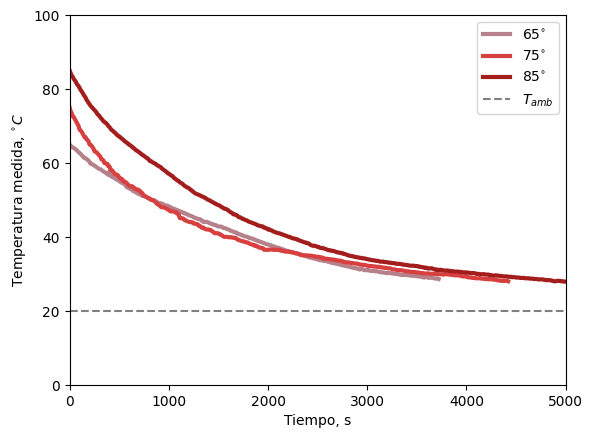

In [297]:
fig, ax = plt.subplots()
for experiment, color in zip(['65','75','85'],colors):
    measurements[experiment].plot(kind='line',x='Tiempo_s',y='Temperatura_C',color=color, lw=3,label='$' + experiment + '^{\\circ}$',ax=ax)
ax.hlines(y=20,xmin=0,xmax=5000,color='grey',ls='--',label='$T_{amb}$')
plt.legend()
ax.set_ylabel('Temperatura medida, $^{\\circ} C$')
ax.set_xlabel('Tiempo, s')
ax.set_ylim(0,100)
ax.set_xlim(0,5000)
plt.show()

# Linealizacion de los datos

In [304]:
point_spacing = 1

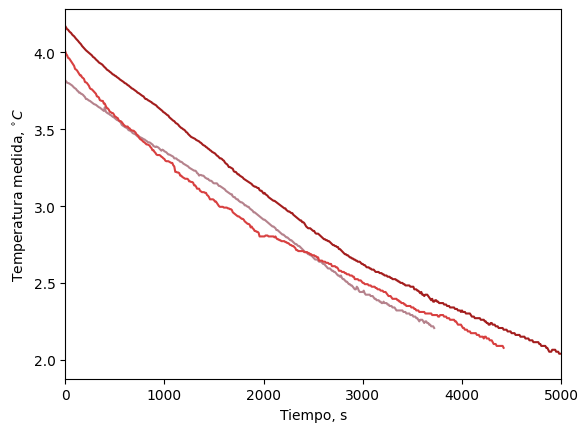

In [305]:
fig, ax = plt.subplots()
for experiment,i, color in zip(['65','75','85'],range(1,4),colors):
    y = np.log(measurements[experiment].Temperatura_C - measurements['General'].loc[i,'Tamb_C'])
    x = measurements[experiment].Tiempo_s 
    ax.plot(x[::point_spacing],y[::point_spacing],color=color)
ax.set_ylabel('Temperatura medida, $^{\\circ} C$')
ax.set_xlabel('Tiempo, s')
ax.set_xlim(0,5000)
plt.show()

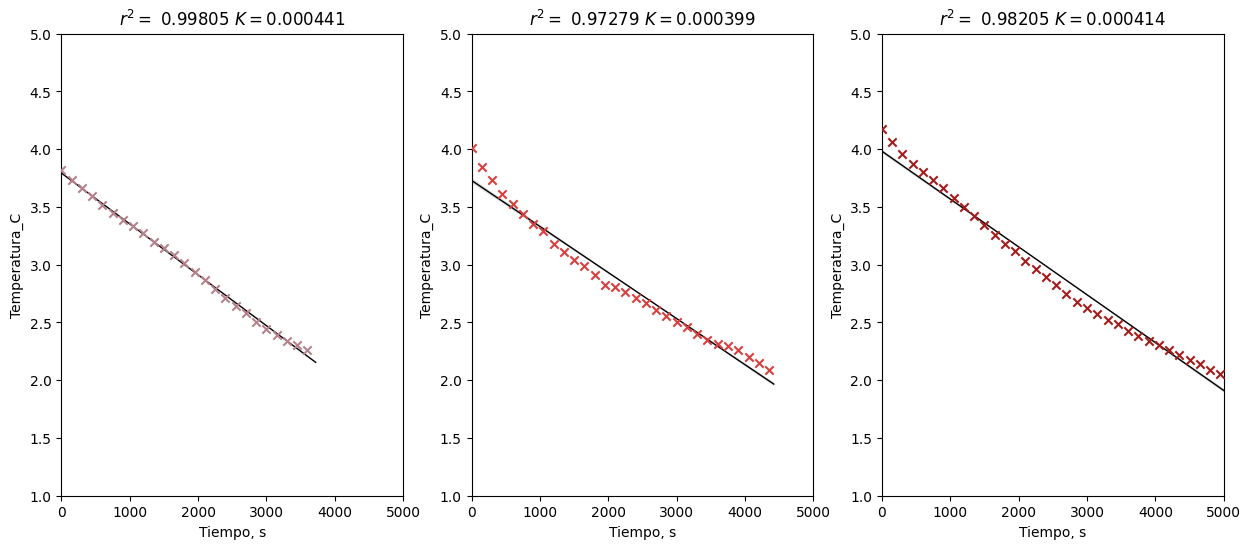

In [358]:
point_spacing = 15
fig, axes = plt.subplots(figsize=(15,6),ncols=3)
for experiment,i,color,ax in zip(['65','75','85'],range(1,4),colors,axes.ravel()):
    y = np.log(measurements[experiment].Temperatura_C - measurements['General'].loc[i,'Tamb_C'])
    x = measurements[experiment].Tiempo_s 
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    sns.regplot(x=x, y=y,scatter=False, line_kws={"color": "black", "lw": 1, "alpha":1},ax=ax)
    ax.scatter(x[::point_spacing],y[::point_spacing],color=color,marker='x',zorder=3)
    ax.set_title(round(r_value**2,5))
    ax.set_title(f'$r^2=$ {round(r_value**2,5)} $K=${-round(slope,6)}')
    ax.set_xlabel('Tiempo, s')
    ax.set_xlim(0,5000)
    ax.set_ylim(1,5)
plt.show()

## Limitacion del intervalo de datos

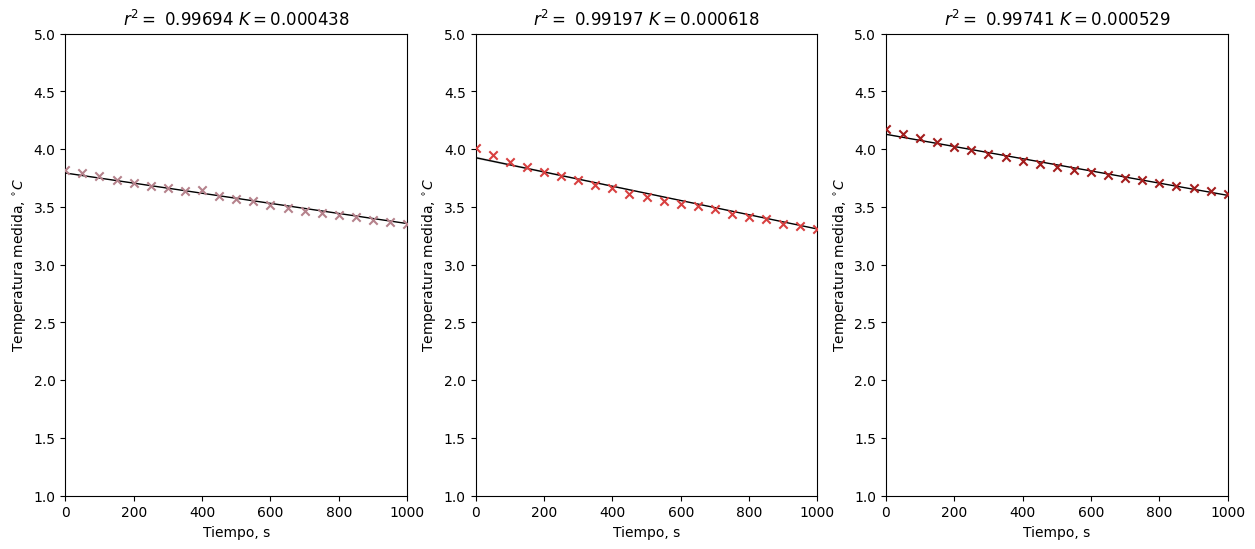

In [357]:
point_spacing = 5
until_id = 150
fig, axes = plt.subplots(figsize=(15,6),ncols=3)
for experiment,i,color,ax in zip(['65','75','85'],range(1,4),colors,axes.ravel()):
    y = np.log(measurements[experiment].Temperatura_C[:until_id] - measurements['General'].loc[i,'Tamb_C'])
    x = measurements[experiment].Tiempo_s[:until_id]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    sns.regplot(x=x, y=y,scatter=False, line_kws={"color": "black", "lw": 1, "alpha":1},ax=ax)
    ax.scatter(x[::point_spacing],y[::point_spacing],color=color,marker='x',zorder=3)
    ax.set_title(f'$r^2=$ {round(r_value**2,5)} $K=${-round(slope,6)}')
    ax.set_ylabel('Temperatura medida, $^{\\circ} C$')
    ax.set_xlabel('Tiempo, s')
    ax.set_xlim(0,1000)
    ax.set_ylim(1,5)
plt.show()

## Visualizacion de incertidumbres

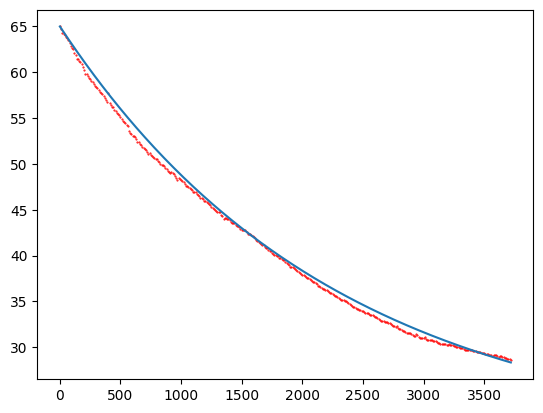

In [180]:
point_spacing = 5
y = np.log(measurements['65'].Temperatura_C - measurements['General'].loc[1,'Tamb_C'])
x = measurements['65'].Tiempo_s 
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# plt.scatter(x[::point_spacing],y[::point_spacing],marker='.',s=1,color='red')
plt.scatter(x,measurements['65'].Temperatura_C,marker='.',s=1,color='red')
plt.plot(x, newton_cooling(x, measurements['General'].loc[1,'Tamb_C'], measurements['65'].Temperatura_C[0], -slope))
plt.show()

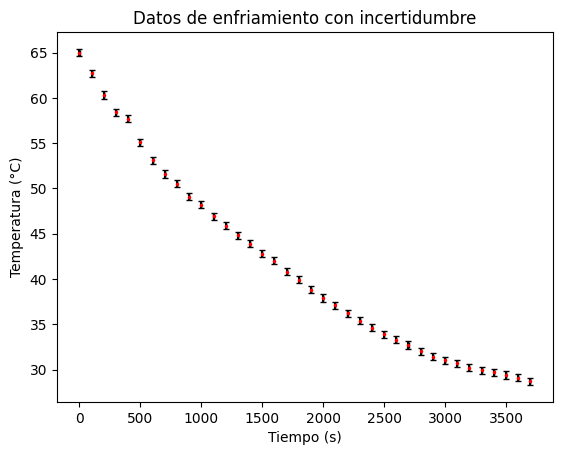

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Definir incertidumbres
dt = 0.4  # Incertidumbre en tiempo (2 * 0.2 s)
dT = 0.4  # Incertidumbre en temperatura (2 * (0.1 + 0.1) °C)

# Extraer datos
x = measurements['65'].Tiempo_s
y = measurements['65'].Temperatura_C

# Graficar puntos con incertidumbres
plt.errorbar(x[::10], y[::10], xerr=dt, yerr=dT, fmt='.', capsize=2, color='red', ecolor='black', markersize=3)

# Etiquetas y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Datos de enfriamiento con incertidumbre")

plt.show()


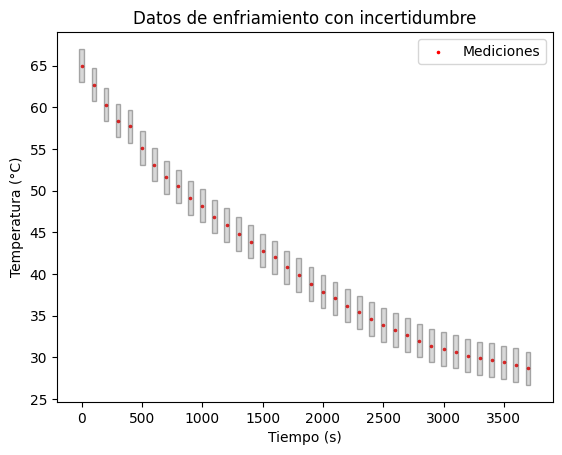

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Definir incertidumbres
dt = 40  # Incertidumbre en tiempo (2 * 0.2 s)
dT = 4  # Incertidumbre en temperatura (2 * (0.1 + 0.1) °C)

# Extraer datos
x = measurements['65'].Tiempo_s
y = measurements['65'].Temperatura_C

# Crear la figura
fig, ax = plt.subplots()

# Graficar puntos
ax.scatter(x[::10], y[::10], color='red', marker='.', s=10, label="Mediciones")

# Dibujar rectángulos de incertidumbre
for xi, yi in zip(x[::10], y[::10]):
    rect = plt.Rectangle((xi - dt / 2, yi - dT / 2), dt, dT, edgecolor='black', facecolor='gray', alpha=0.3)
    ax.add_patch(rect)

# Etiquetas y título
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Datos de enfriamiento con incertidumbre")
plt.legend()
plt.show()


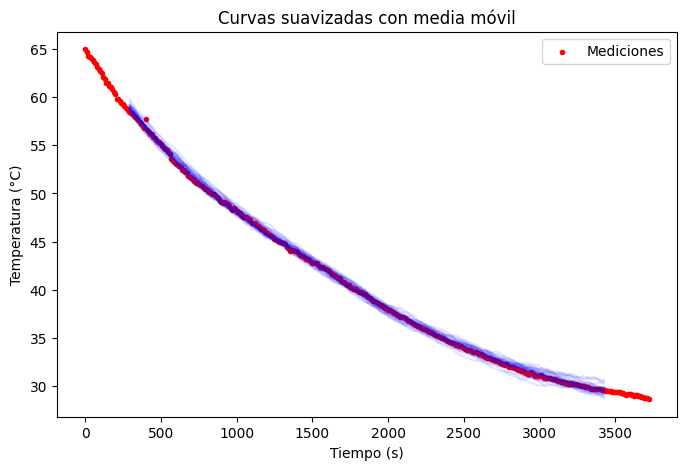

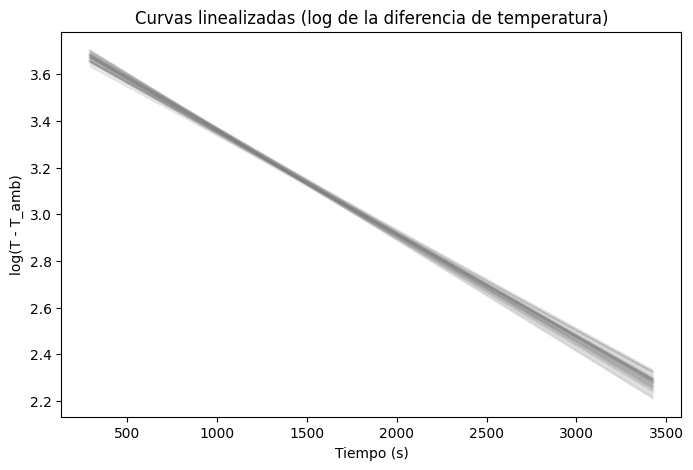

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Definir incertidumbres
dt = 40  # Incertidumbre en tiempo (2 * 0.2 s)
dT = 10  # Incertidumbre en temperatura (2 * (0.1 + 0.1) °C)

# Extraer datos
x_med = measurements['65'].Tiempo_s
y_med = measurements['65'].Temperatura_C
Tamb = measurements['General'].loc[1, 'Tamb_C']  # Temperatura ambiente

# Número de curvas aleatorias
num_curvas = 30
window_size = 60  # Tamaño de la ventana para la media móvil

# Función de media móvil
def moving_average(arr, window):
    return np.convolve(arr, np.ones(window)/window, mode='valid')

# Almacenar todas las curvas suavizadas
curvas_x = []
curvas_y = []
curvas_x_log = []
curvas_y_log = []

for _ in range(num_curvas):
    # Muestreo uniforme dentro de los rectángulos de incertidumbre
    x_sample = x_med + np.random.uniform(-dt/2, dt/2, size=len(x_med))
    y_sample = y_med + np.random.uniform(-dT/2, dT/2, size=len(y_med))
    
    # Aplicar media móvil (se recortarán los extremos debido a la convolución)
    x_smooth = moving_average(x_sample, window_size)
    y_smooth = moving_average(y_sample, window_size)
    y_log = np.log(np.maximum(y_smooth - Tamb, 1e-6))  # Asegura valores positivos
    
    # Guardar la curva suavizada
    curvas_x.append(x_smooth)
    curvas_y.append(y_smooth)
    curvas_x_log.append(x_smooth) 
    curvas_y_log.append(y_log)

plt.figure(figsize=(8, 5))
for i in range(num_curvas):
    plt.plot(curvas_x[i], curvas_y[i], alpha=0.1, color='blue')

plt.scatter(x_med, y_med, color='red', marker='.', label="Mediciones")

plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Curvas suavizadas con media móvil")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for i in range(num_curvas):
    # plt.plot(curvas_x_log[i], curvas_y_log[i], alpha=0.3, color='green')
    sns.regplot(x=curvas_x_log[i], y=curvas_y_log[i],scatter=False, line_kws={"color": "gray", "lw": 2, "alpha":0.1})
    
plt.xlabel("Tiempo (s)")
plt.ylabel("log(T - T_amb)")
plt.title("Curvas linealizadas (log de la diferencia de temperatura)")
plt.show()

In [165]:


# Ajuste lineal


print(f"Pendiente: {-1*slope}")
print(f"Ordenada al origen: {intercept}")


Pendiente: 0.0004406771306051617
Ordenada al origen: 3.794211522495946


In [6]:
base_dir = Path.cwd().parent  # Subir un nivel desde el notebook
data_dir = base_dir / "data"
final_dir = data_dir / "final"
subfolder = final_dir / "1_enfriamiento"  # Carpeta específica dentro de final/

# Crear la carpeta si no existe
subfolder.mkdir(parents=True, exist_ok=True)

# Mostrar ruta creada
print(f"Archivos serán guardados en: {subfolder}")

# -------- Ejemplo: Guardar un CSV en 1_enfriamiento --------
df = pd.DataFrame({"Temperatura": [20, 18, 15, 10], "Tiempo": [0, 10, 20, 30]})
df.to_csv(subfolder / "datos_enfriamiento.csv", index=False)

# -------- Ejemplo: Guardar una imagen en 1_enfriamiento --------
plt.plot(df["Tiempo"], df["Temperatura"], marker="o")
plt.xlabel("Tiempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Curva de Enfriamiento")

# Guardar imagen en la carpeta creada
img_path = subfolder / "curva_enfriamiento.png"
plt.savefig(img_path, dpi=300, bbox_inches="tight")

print(f"Imagen guardada en: {img_path}")


'C:\\Users\\futr_\\git-repos\\3_Cursos\\fc-lab-fenomenos\\notebooks-lab\\..\\data\\raw'

Calcular $K_{\text{teorica}}$ como:


$$
K_{Teorica} = \frac{h(T_i)}{\rho (T_i) C_p (T_i) V}
$$

Si a $60 ^{\circ} C$ con convección natural, 


\begin{equation}
\begin{aligned}
    h(60) &\approx 10 \quad \text{W/m}^2\text{K} \\
    \rho(60) &= 983.3 \quad \text{kg/m}^3 \\
    C_p(60) &= 4166 \quad \text{J/kgK} \\
    V &= 0.001 \quad \text{m}^3
\end{aligned}
\end{equation}

$$
\Rightarrow K_{Teorica} = \frac{10}{9.83 \times 4166 \times 0.001}
$$

Determina $\rho(T)$ y $Cp(T)$

In [91]:
np.log(5/4)

np.float64(0.22314355131420976)

$$
K=\frac{\mathrm{~W} / \mathrm{m}^2 \mathrm{~K}}{\left(\mathrm{~kg} / \mathrm{m}^3\right) \times( \mathrm{~J} / \mathrm{kgK}) \times\left( \mathrm{~m}^3\right)} 
=\frac{ \mathrm{~J} /\left(\mathrm{s} \cdot \mathrm{~m}^2 \mathrm{~K}\right)}{\left(\mathrm{~kg} / \mathrm{m}^3\right) \times( \mathrm{~J} / \mathrm{kgK}) \times\left( \mathrm{~m}^3\right)}
= \frac{J /\left(s \cdot m^2 K\right)}{J / K}=\frac{1}{s}
$$

In [12]:
# Water Properties
temperature = [20, 30, 40, 50, 60, 70, 80]
heat_capacity = [4182, 4178, 4174, 4170, 4166, 4162, 4158] # Isobaric mass heat capacity
density = [998.0, 995.7, 992.2, 988.1, 983.3, 977.8, 971.8]
labels = ['Temp','Cp','Rho']

water_properties = pd.DataFrame(zip(temperature, heat_capacity, density),columns = labels)

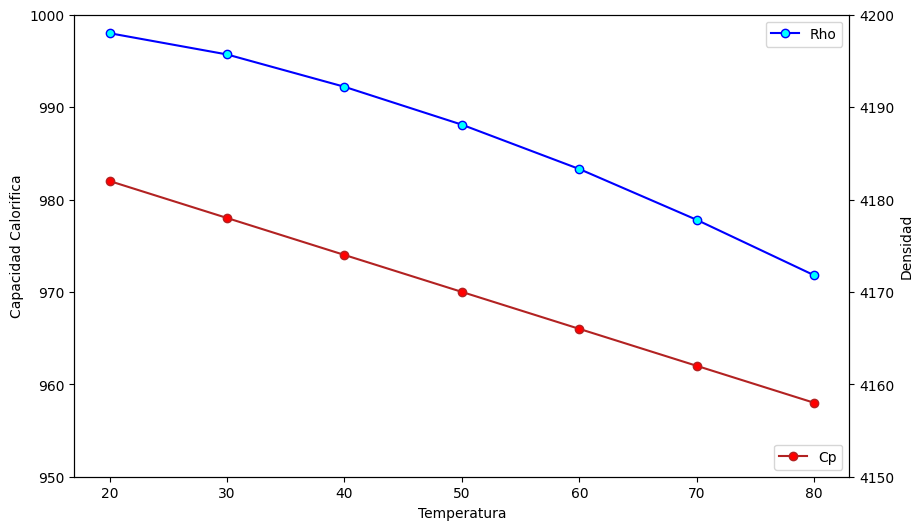

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
water_properties.plot(x='Temp',y='Rho',ls='-',marker='o',mfc='cyan',color='blue',ax=ax)
water_properties.plot(x='Temp',y='Cp',ls='-',marker='o',mfc='red',color='firebrick',ax=ax2,legend='lower')
ax.legend(loc='upper right')
ax2.legend(loc='lower right')
ax.set_ylim(950,1000)
ax2.set_ylim(4150,4200)
ax.set_ylabel('Capacidad Calorifica')
ax2.set_ylabel('Densidad')
ax.set_xlabel('Temperatura')
plt.show()

In [64]:
!pip install iapws -q

In [98]:
10/(9.83 * 4166 * 0.5)

0.0004883792597049505

In [68]:
from iapws import IAPWS97
water = IAPWS97(T=300, P=0.1)  # Temperatura en K, presión en MPa
print(water.cp)  # Calor específico a presión constante en kJ/kg·K
print(water.rho)  # Densidad en kg/m³

4.181101061896753
996.5574824996619


In [70]:
# from CoolProp.CoolProp import PropsSI
cp = PropsSI("CPMASS", "T", 300, "P", 101325, "Water")  # J/kg·K
rho = PropsSI("D", "T", 300, "P", 101325, "Water")  # kg/m³
print(cp, rho)

4180.6357765560715 996.5569352652021


In [76]:
temp_kelvin = np.array(temperature) + 273.15

cp = PropsSI("CPMASS", "T", temp_kelvin, "P", 101325*0.7643, "Water")
rho = PropsSI("D", "T", temp_kelvin, "P", 101325*0.7643, "Water")

In [82]:
cp

array([4184.12559761, 4179.88460192, 4179.47365449, 4181.39743715,
       4185.00632498, 4190.11928077, 4196.80557891])

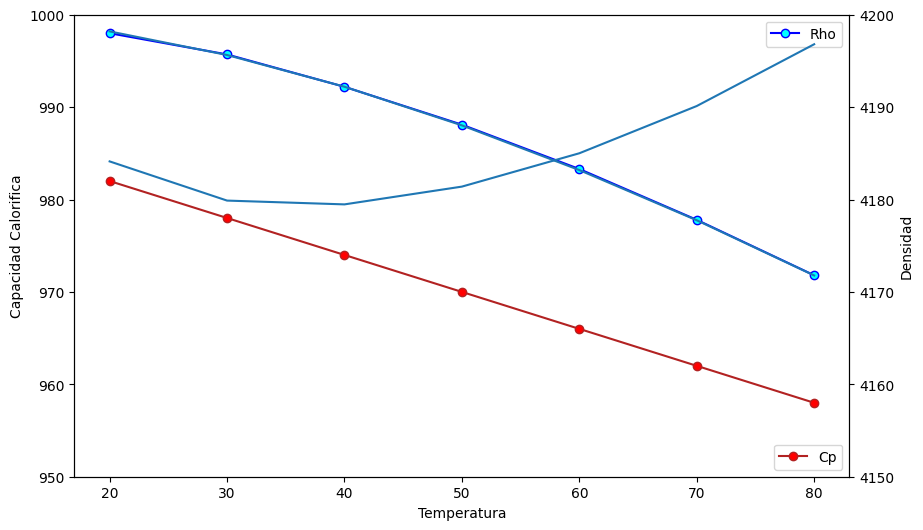

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
water_properties.plot(x='Temp',y='Rho',ls='-',marker='o',mfc='cyan',color='blue',ax=ax)
ax.plot(temperature, rho)
water_properties.plot(x='Temp',y='Cp',ls='-',marker='o',mfc='red',color='firebrick',ax=ax2,legend='lower')
ax2.plot(temperature, cp)
ax.legend(loc='upper right')
ax2.legend(loc='lower right')
ax.set_ylim(950,1000)
ax2.set_ylim(4150,4200)
ax.set_ylabel('Capacidad Calorifica')
ax2.set_ylabel('Densidad')
ax.set_xlabel('Temperatura')
plt.show()

In [ ]:
pd.read()